In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [98]:
bench = pd.read_csv('./benchpress_coords.csv')
squat = pd.read_csv('./squat_coords.csv')
deadlift = pd.read_csv('./deadlift_coords.csv')

In [99]:
# 각도 계산 함수
def calculateAngle(a, b, c):
    a = np.array(a)  # 첫 번째 지점
    b = np.array(b)  # 중간 지점
    c = np.array(c)  # 끝 지점

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(
        a[1] - b[1], a[0] - b[0]
    )
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

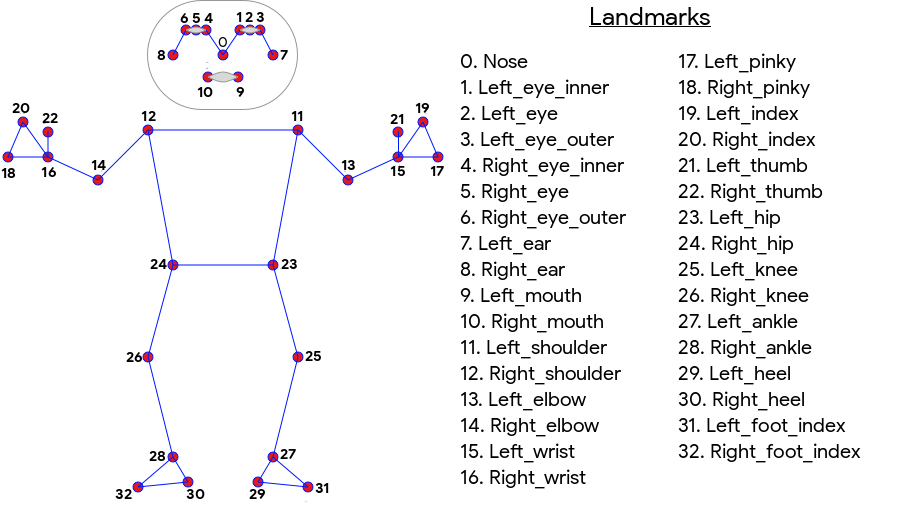

In [100]:
# 코: x1, y1
# 좌측 어깨: x12, y12, 좌측 팔꿈치: x14, y14, 좌측 손목: x16, y16, 좌측 발목: x28, y28, 좌측 힐: x30, y30
# 우측 어깨: x13, y13, 좌측 팔꿈치: x15, y15, 좌측 손목: x17, y17, 좌측 발목: x29, y29, 좌측 힐: x31, y31

In [101]:
def extract_joint_coordinates(df):
    nose = []
    left_shoulder = []
    left_elbow = []
    left_wrist = []
    left_hip = []
    left_knee = []
    left_ankle = []
    left_heel = []
    right_shoulder = []
    right_elbow = []
    right_wrist = []
    right_hip = []
    right_knee = []
    right_ankle = []
    right_heel = []

    for i in range(len(df)):
        nose.append([df['x1'].values[i], df['y1'].values[i]])
        left_shoulder.append([df['x12'].values[i], df['y12'].values[i]])
        left_elbow.append([df['x14'].values[i], df['y14'].values[i]])
        left_wrist.append([df['x16'].values[i], df['y16'].values[i]])
        left_hip.append([df['x26'].values[i], df['y26'].values[i]])
        left_knee.append([df['x28'].values[i], df['y28'].values[i]])
        left_ankle.append([df['x30'].values[i], df['y30'].values[i]])
        left_heel.append([df['x32'].values[i], df['y32'].values[i]])
        right_shoulder.append([df['x13'].values[i], df['y13'].values[i]])
        right_elbow.append([df['x15'].values[i], df['y15'].values[i]])
        right_wrist.append([df['x17'].values[i], df['y17'].values[i]])
        right_hip.append([df['x27'].values[i], df['y27'].values[i]])
        right_knee.append([df['x29'].values[i], df['y29'].values[i]])
        right_ankle.append([df['x31'].values[i], df['y31'].values[i]])
        right_heel.append([df['x33'].values[i], df['y33'].values[i]])

    return nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel

In [102]:
# 관절 좌표값 추출
nose, left_shoulder, left_elbow, left_wrist, left_hip, left_knee, left_ankle, left_heel, right_shoulder, right_elbow, right_wrist, right_hip, right_knee, right_ankle, right_heel = extract_joint_coordinates(bench)

# 결과 출력
print("Nose:", nose[:5])
print("Left shoulder:", left_shoulder[:5])
print("Left elbow:", left_elbow[:5])
print("Left wrist:", left_wrist[:5])
print("Left hip:", left_hip[:5])
print("Left knee:", left_knee[:5])
print("Left ankle:", left_ankle[:5])
print("Left heel:", left_heel[:5])
print("Right shoulder:", right_shoulder[:5])
print("Right elbow:", right_elbow[:5])
print("Right wrist:", right_wrist[:5])
print("Right hip:", right_hip[:5])
print("Right knee:", right_knee[:5])
print("Right ankle:", right_ankle[:5])
print("Right heel:", right_heel[:5])

In [103]:
neck_angle = [(calculateAngle(left_shoulder[i], nose[i], left_hip[i]) + calculateAngle(right_shoulder[i], nose[i], right_hip[i])) / 2 for i in range(len(nose))]
left_elbow_angle = [calculateAngle(left_shoulder[i], left_elbow[i], left_wrist[i]) for i in range(len(left_shoulder))]
right_elbow_angle = [calculateAngle(right_shoulder[i], right_elbow[i], right_wrist[i]) for i in range(len(right_shoulder))]
left_shoulder_angle = [calculateAngle(left_elbow[i], left_shoulder[i], left_hip[i]) for i in range(len(left_elbow))]
right_shoulder_angle = [calculateAngle(right_elbow[i], right_shoulder[i], right_hip[i]) for i in range(len(right_elbow))]
left_hip_angle = [calculateAngle(left_shoulder[i], left_hip[i], left_knee[i]) for i in range(len(left_shoulder))]
right_hip_angle = [calculateAngle(right_shoulder[i], right_hip[i], right_knee[i]) for i in range(len(right_shoulder))]
left_knee_angle = [calculateAngle(left_hip[i], left_knee[i], left_ankle[i]) for i in range(len(left_hip))]
right_knee_angle = [calculateAngle(right_hip[i], right_knee[i], right_ankle[i]) for i in range(len(right_hip))]
left_ankle_angle = [calculateAngle(left_knee[i], left_ankle[i], left_heel[i]) for i in range(len(left_knee))]
right_ankle_angle = [calculateAngle(right_knee[i], right_ankle[i], right_heel[i]) for i in range(len(right_knee))]

print("Neck angle:", neck_angle)
print("Left elbow angle:", left_elbow_angle)
print("Right elbow angle:", right_elbow_angle)
print("Left shoulder angle:", left_shoulder_angle)
print("Right shoulder angle:", right_shoulder_angle)
print("Left hip angle:", left_hip_angle)
print("Right hip angle:", right_hip_angle)
print("Left knee angle:", left_knee_angle)
print("Right knee angle:", right_knee_angle)
print("Left ankle angle:", left_ankle_angle)
print("Right ankle angle:", right_ankle_angle)

In [104]:
def calculate_joint_angles(row):
    nose = [row['x1'], row['y1']]
    left_shoulder = [row['x12'], row['y12']]
    left_elbow = [row['x14'], row['y14']]
    left_wrist = [row['x16'], row['y16']]
    left_hip = [row['x26'], row['y26']]
    left_knee = [row['x28'], row['y28']]
    left_ankle = [row['x30'], row['y30']]
    left_heel = [row['x32'], row['y32']]
    right_shoulder = [row['x13'], row['y13']]
    right_elbow = [row['x15'], row['y15']]
    right_wrist = [row['x17'], row['y17']]
    right_hip = [row['x27'], row['y27']]
    right_knee = [row['x29'], row['y29']]
    right_ankle = [row['x31'], row['y31']]
    right_heel = [row['x33'], row['y33']]

    neck_angle = (calculateAngle(left_shoulder, nose, left_hip) + calculateAngle(right_shoulder, nose, right_hip)) / 2
    left_elbow_angle = calculateAngle(left_shoulder, left_elbow, left_wrist)
    right_elbow_angle = calculateAngle(right_shoulder, right_elbow, right_wrist)
    left_shoulder_angle = calculateAngle(left_elbow, left_shoulder, left_hip)
    right_shoulder_angle = calculateAngle(right_elbow, right_shoulder, right_hip)
    left_hip_angle = calculateAngle(left_shoulder, left_hip, left_knee)
    right_hip_angle = calculateAngle(right_shoulder, right_hip, right_knee)
    left_knee_angle = calculateAngle(left_hip, left_knee, left_ankle)
    right_knee_angle = calculateAngle(right_hip, right_knee, right_ankle)
    left_ankle_angle = calculateAngle(left_knee, left_ankle, left_heel)
    right_ankle_angle = calculateAngle(right_knee, right_ankle, right_heel)

    return pd.Series([neck_angle, left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle, left_ankle_angle, right_ankle_angle])

# 1. bench

In [105]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
bench[angle_columns] = bench.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(bench[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

bench = pd.concat([bench, scaled_angles_df], axis=1)
bench.to_csv("benchpress_with_scaled_angles.csv", index=False)

In [106]:
bench

# Squat

In [107]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
squat[angle_columns] = squat.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(squat[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

squat = pd.concat([squat, scaled_angles_df], axis=1)
squat.to_csv("squat_with_scaled_angles.csv", index=False)
squat

# Deadlift

In [108]:
angle_columns = ['neck_angle', 'left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_hip_angle', 'right_hip_angle', 'left_knee_angle', 'right_knee_angle', 'left_ankle_angle', 'right_ankle_angle']
deadlift[angle_columns] = deadlift.apply(calculate_joint_angles, axis=1)

scaler = MinMaxScaler()
scaled_angles = scaler.fit_transform(deadlift[angle_columns])

scaled_angles_df = pd.DataFrame(scaled_angles, columns=angle_columns)

deadlift = pd.concat([squat, scaled_angles_df], axis=1)
deadlift.to_csv("deadlift_with_scaled_angles.csv", index=False)
deadlift